Задача: Используя нейронные сети, создать модели, которые предсказывают какая цифра отображена на изображении.

Данные: MNIST

Подробнее о данных: https://en.wikipedia.org/wiki/MNIST_database


**1.** Загрузить данные с библиотеки keras MNIST.

`from keras.datasets import mnist` через функцию `load_data`

Распределить данные на тренировочную и валидационную выборки. Посчитать количество экземляров для каждого класса в тренировочной и валидационной выборке. Вычислить какую часть данных от всех составляет валидационная выборка. 

Вывести в виде изображения по одному примеру из каждого класса с указанием какая это цифра в заголовке.

`import matplotlib.pyplot as plt
plt.title(label)
plt.imshow(img)
`

**Tip:** https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html

Статья по теме: https://webtort.ru/%D1%80%D0%B5%D1%88%D0%B0%D0%B5%D0%BC-%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D1%83-mnist-%D0%B2-keras-%D0%B8%D0%BB%D0%B8-%D1%83%D1%87%D0%B8%D0%BC-%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D1%8C-%D1%80/

In [ ]:
from keras.datasets import mnist 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt
from keras import layers
from keras import utils
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential


In [ ]:
batch_size = 128 
num_epochs = 20 
hidden_size = 512 
num_train = 60000 
num_test = 10000 
height, width, depth = 28, 28, 1 
num_classes = 10 

In [ ]:
# Узнаем длины полученных массивов
print(len(x_train), len(y_train), len(x_test), len(y_train))
# Проверка типа и размера данных
print(x_train[0].shape, x_train[0].dtype)

60000 60000 10000 60000
(28, 28) uint8


In [ ]:
# Вычислить какую часть данных от всех составляет валидационная выборка.
num = len(x_test) + len(y_train)
den = len(x_test) + len(y_train) + len(x_train) + len(y_train)
proc = num*100/den
proc

36.8421052631579

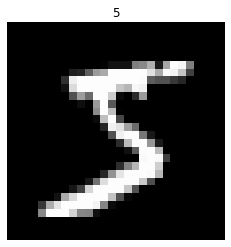

In [ ]:
# Вывести в виде изображения по примеру из каждого класса с указанием какая это цифра 
def plot_number(i):
  plt.imshow(x_train[i], cmap='gray')
  plt.title(str(y_train[i]))
  plt.axis('off')

plot_number(0)

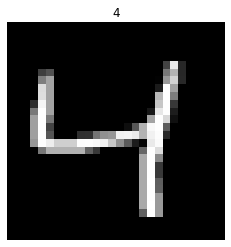

In [ ]:
plot_number(1)
plot_number(2)

**2.** Данные необходимо предобработать: поменять тип данных на *float32*, произвести *MinMax* нормализацию данных

In [ ]:
# приведем к нужной размерности
x_train1 = x_train.reshape(num_train, height * width) # Flatten data to 1D
x_test1 = x_test.reshape(num_test, height * width) # Flatten data to 1D
x_train2 = x_train.reshape(num_train, height, width) # Flatten data to 1D
x_test2 = x_test.reshape(num_test, height, width) # Flatten data to 1D
in_shape = (28, 28, 1)
# Преобразуем целевые значения методом «one-hot encoding»
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

def normalize(x_train, x_test):

  # нормализуем, так как значение пикселя меняется от 0 до 255
  x_train = x_train.astype('float32') / 255.
  x_test = x_test.astype('float32') / 255.

  return (x_train, x_test)

data1 = normalize(x_train1, x_test1)
x_train1, x_test1 = data1[0], data1[1]
data2 = normalize(x_train2, x_test2)
x_train2, x_test2 = data2[0], data2[1]

**3.** Постройте несколько архтектур нейронных сетей (!После каждого эксперимента построить графики функции потерь и метрик):

**1)Три полносвязных слоя**

In [ ]:
# графики зависимости метрик от количества эпох
def plot_accuracy(history):
  try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
  except Exception:
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
# Создаем модель
model1 = Sequential()
model1.add(Dense(hidden_size, activation='relu', input_shape=(28*28,))) 
model1.add(Dense(hidden_size, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

# Выведем полученную модель на экран
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
params1 = {
    'loss': 'categorical_crossentropy' ,
    'optimizer': 'adam',
    'metrics' : 'accuracy',
    'batch_size': batch_size,
    'epochs': num_epochs,
    'val_split': 0.1}

In [ ]:
def model_training(model, params, x_train, y_train, x_test, y_test):
  ''' Trais model with specified params and
      returns model predictions'''

  model.compile(loss= params['loss'], 
              optimizer= params['optimizer'], 
              metrics= params['metrics']) 
  
  hist = model.fit(x_train, y_train, 
          batch_size= params['batch_size'], 
          epochs = params['epochs'],
          verbose=1, validation_split= params['val_split']) 
  
  res = model.evaluate(x_test, y_test, verbose=1) 
  y_pred = model.predict(x_test)
  plot_accuracy(hist)
  plot_loss(hist)
  print('Loss and accuracy: ', res)
  return y_pred

Epoch 1/20
422/422 [==============================] - 22s 47ms/step - loss: 0.2328 - accuracy: 0.9319 - val_loss: 0.0905 - val_accuracy: 0.9720
Epoch 2/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0837 - accuracy: 0.9744 - val_loss: 0.0778 - val_accuracy: 0.9775
Epoch 3/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0535 - accuracy: 0.9830 - val_loss: 0.0801 - val_accuracy: 0.9752
Epoch 4/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0360 - accuracy: 0.9883 - val_loss: 0.0724 - val_accuracy: 0.9790
Epoch 5/20
422/422 [==============================] - 6s 15ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0715 - val_accuracy: 0.9795
Epoch 6/20
422/422 [==============================] - 6s 13ms/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0775 - val_accuracy: 0.9787
Epoch 7/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0802 - val_accuracy: 0.980

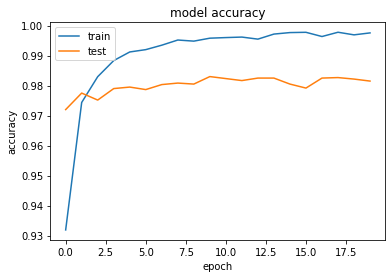

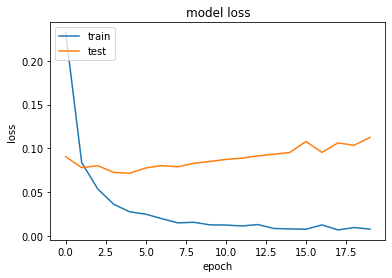

Loss and accuracy:  [0.10790108889341354, 0.9807000160217285]


In [ ]:
m1_0 = model_training(model1, params1, x_train1, y_train, x_test1, y_test)

Проверим, что будет, если увеличить количество эпох

Epoch 1/30
422/422 [==============================] - 7s 15ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.1154 - val_accuracy: 0.9828
Epoch 2/30
422/422 [==============================] - 6s 15ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.1034 - val_accuracy: 0.9858
Epoch 3/30
422/422 [==============================] - 6s 15ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.1017 - val_accuracy: 0.9855
Epoch 4/30
422/422 [==============================] - 7s 16ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.1184 - val_accuracy: 0.9818
Epoch 5/30
422/422 [==============================] - 6s 15ms/step - loss: 0.0073 - accuracy: 0.9982 - val_loss: 0.1124 - val_accuracy: 0.9822
Epoch 6/30
422/422 [==============================] - 6s 14ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.1004 - val_accuracy: 0.9855
Epoch 7/30
422/422 [==============================] - 7s 15ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1188 - val_accuracy: 0.9845

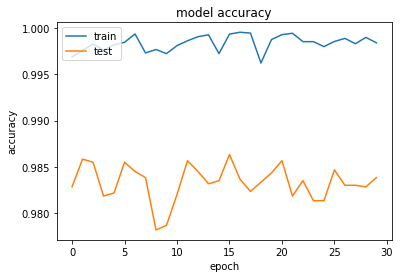

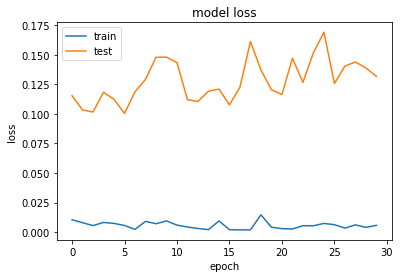

Loss and accuracy:  [0.12985168397426605, 0.9842000007629395]


In [ ]:
params1['epochs'] = 30
m1_1 = model_training(model1, params1, x_train1, y_train, x_test1, y_test)

Epoch 1/15
422/422 [==============================] - 6s 13ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.1948 - val_accuracy: 0.9813
Epoch 2/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.1559 - val_accuracy: 0.9827
Epoch 3/15
422/422 [==============================] - 6s 13ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.1665 - val_accuracy: 0.9843
Epoch 4/15
422/422 [==============================] - 6s 13ms/step - loss: 0.0075 - accuracy: 0.9981 - val_loss: 0.1577 - val_accuracy: 0.9825
Epoch 5/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.1459 - val_accuracy: 0.9845
Epoch 6/15
422/422 [==============================] - 6s 13ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.1664 - val_accuracy: 0.9853
Epoch 7/15
422/422 [==============================] - 6s 13ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.1680 - val_accuracy: 0.9828

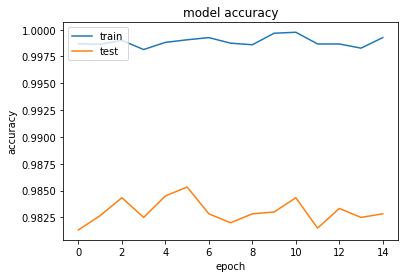

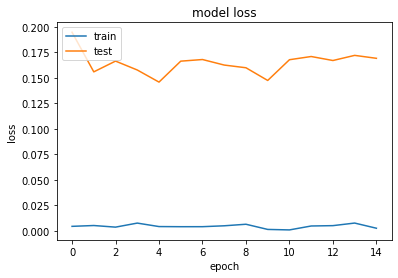

Loss and accuracy:  [0.13357411324977875, 0.984000027179718]


In [ ]:
params1['epochs'] = 15
m1_2 = model_training(model1, params1, x_train1, y_train, x_test1, y_test)

Видим, что 15-20 эпох являются оптмальными. Попробуем также другие параметры для первой модели:

Epoch 1/15
422/422 [==============================] - 7s 14ms/step - loss: 0.0018 - binary_accuracy: 1.0000 - val_loss: 0.0192 - val_binary_accuracy: 0.9972
Epoch 2/15
422/422 [==============================] - 6s 14ms/step - loss: 5.4933e-05 - binary_accuracy: 1.0000 - val_loss: 0.0181 - val_binary_accuracy: 0.9972
Epoch 3/15
422/422 [==============================] - 6s 13ms/step - loss: 1.1668e-05 - binary_accuracy: 1.0000 - val_loss: 0.0183 - val_binary_accuracy: 0.9974
Epoch 4/15
422/422 [==============================] - 6s 13ms/step - loss: 5.9157e-06 - binary_accuracy: 1.0000 - val_loss: 0.0185 - val_binary_accuracy: 0.9974
Epoch 5/15
422/422 [==============================] - 6s 15ms/step - loss: 3.9967e-06 - binary_accuracy: 1.0000 - val_loss: 0.0188 - val_binary_accuracy: 0.9975
Epoch 6/15
422/422 [==============================] - 6s 14ms/step - loss: 2.8117e-06 - binary_accuracy: 1.0000 - val_loss: 0.0191 - val_binary_accuracy: 0.9976
Epoch 7/15
422/422 [==================

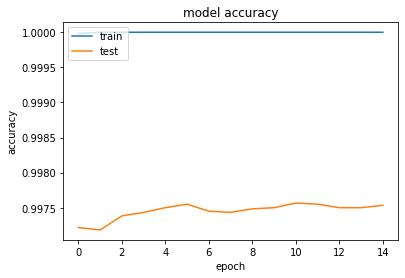

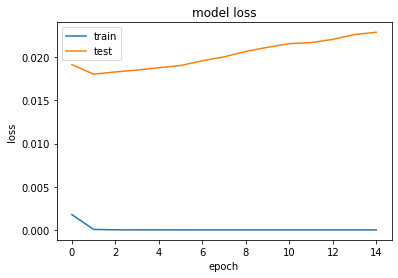

Loss and accuracy:  [0.021651575341820717, 0.9973694086074829]


In [ ]:
params2 = {
    'loss': 'binary_crossentropy' ,
    'optimizer': 'adam',
    'metrics' :  'binary_accuracy',
    'batch_size': batch_size,
    'epochs': 15,
    'val_split': 0.1}

m1_31 = model_training(model1, params2, x_train1, y_train, x_test1, y_test)

Epoch 1/20
422/422 [==============================] - 7s 15ms/step - loss: 1.9985e-07 - binary_accuracy: 1.0000 - val_loss: 0.0247 - val_binary_accuracy: 0.9974
Epoch 2/20
422/422 [==============================] - 6s 15ms/step - loss: 0.0015 - binary_accuracy: 0.9998 - val_loss: 0.0220 - val_binary_accuracy: 0.9971
Epoch 3/20
422/422 [==============================] - 7s 15ms/step - loss: 2.1840e-04 - binary_accuracy: 1.0000 - val_loss: 0.0215 - val_binary_accuracy: 0.9975
Epoch 4/20
422/422 [==============================] - 7s 16ms/step - loss: 8.4050e-05 - binary_accuracy: 1.0000 - val_loss: 0.0219 - val_binary_accuracy: 0.9971
Epoch 5/20
422/422 [==============================] - 6s 15ms/step - loss: 4.3779e-05 - binary_accuracy: 1.0000 - val_loss: 0.0208 - val_binary_accuracy: 0.9977
Epoch 6/20
422/422 [==============================] - 6s 15ms/step - loss: 5.9304e-04 - binary_accuracy: 0.9999 - val_loss: 0.0272 - val_binary_accuracy: 0.9965
Epoch 7/20
422/422 [==================

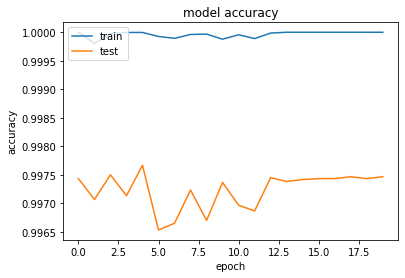

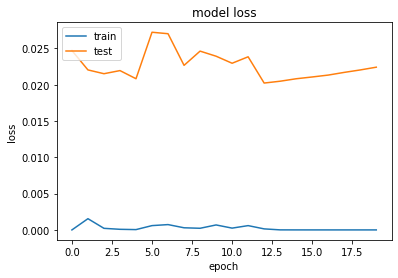

Loss and accuracy:  [0.021373867988586426, 0.9976194500923157]


In [ ]:
params2['epochs'] = 20
m1_32 = model_training(model1, params2, x_train1, y_train, x_test1, y_test)

Epoch 1/30
422/422 [==============================] - 7s 14ms/step - loss: 2.3889e-04 - binary_accuracy: 1.0000 - val_loss: 0.0327 - val_binary_accuracy: 0.9964
Epoch 2/30
422/422 [==============================] - 5s 13ms/step - loss: 8.5865e-04 - binary_accuracy: 0.9999 - val_loss: 0.0264 - val_binary_accuracy: 0.9971
Epoch 3/30
422/422 [==============================] - 6s 14ms/step - loss: 1.9963e-04 - binary_accuracy: 1.0000 - val_loss: 0.0259 - val_binary_accuracy: 0.9971
Epoch 4/30
422/422 [==============================] - 6s 14ms/step - loss: 1.2111e-05 - binary_accuracy: 1.0000 - val_loss: 0.0244 - val_binary_accuracy: 0.9974
Epoch 5/30
422/422 [==============================] - 6s 14ms/step - loss: 1.0995e-06 - binary_accuracy: 1.0000 - val_loss: 0.0244 - val_binary_accuracy: 0.9974
Epoch 6/30
422/422 [==============================] - 6s 14ms/step - loss: 6.2165e-07 - binary_accuracy: 1.0000 - val_loss: 0.0244 - val_binary_accuracy: 0.9974
Epoch 7/30
422/422 [==============

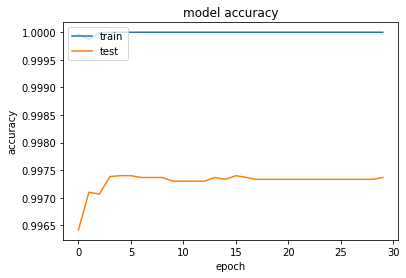

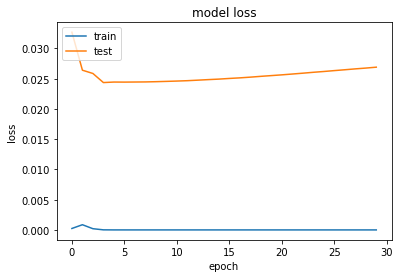

Loss and accuracy:  [0.025686277076601982, 0.9973094463348389]


In [ ]:
params2['epochs'] = 30
m1_33 = model_training(model1, params2, x_train1, y_train, x_test1, y_test)

Видим, что, по крайней мере для первой модели, оптимальным являееся последний набор параметров и 20 эпох.

**Один сверточный слой и один полносвязный**

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', activation='relu',input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2), strides=2))
model2.add(Flatten())
model2.add(Dense(10,  activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
422/422 [==============================] - 25s 57ms/step - loss: 0.0051 - binary_accuracy: 0.9985 - val_loss: 0.0134 - val_binary_accuracy: 0.9965
Epoch 2/15
422/422 [==============================] - 23s 55ms/step - loss: 0.0047 - binary_accuracy: 0.9986 - val_loss: 0.0134 - val_binary_accuracy: 0.9963
Epoch 3/15
422/422 [==============================] - 23s 55ms/step - loss: 0.0046 - binary_accuracy: 0.9987 - val_loss: 0.0137 - val_binary_accuracy: 0.9964
Epoch 4/15
422/422 [==============================] - 24s 57ms/step - loss: 0.0043 - binary_accuracy: 0.9988 - val_loss: 0.0137 - val_binary_accuracy: 0.9965
Epoch 5/15
422/422 [==============================] - 24s 56ms/step - loss: 0.0042 - binary_accuracy: 0.9988 - val_loss: 0.0137 - val_binary_accuracy: 0.9965
Epoch 6/15
422/422 [==============================] - 25s 59ms/step - loss: 0.0040 - binary_accuracy: 0.9989 - val_loss: 0.0136 - val_binary_accuracy: 0.9966
Epoch 7/15
422/422 [==============================] 

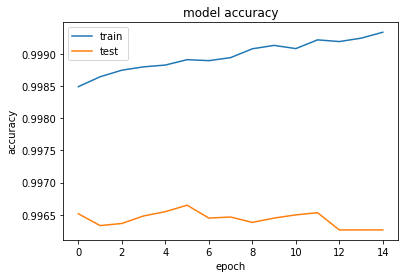

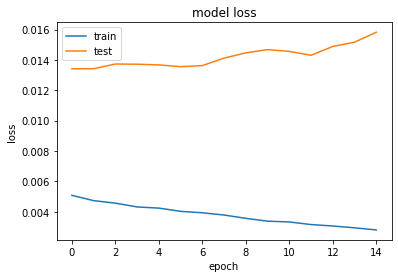

Loss and accuracy:  [0.01833871752023697, 0.9953898191452026]


In [ ]:
params2['epochs'] = 15
m2_1 = model_training(model2, params2, x_train2, y_train, x_test2, y_test) # 15 epochs

Epoch 1/20
422/422 [==============================] - 36s 84ms/step - loss: 0.0028 - binary_accuracy: 0.9993 - val_loss: 0.0152 - val_binary_accuracy: 0.9963
Epoch 2/20
422/422 [==============================] - 24s 57ms/step - loss: 0.0026 - binary_accuracy: 0.9994 - val_loss: 0.0152 - val_binary_accuracy: 0.9963
Epoch 3/20
422/422 [==============================] - 24s 57ms/step - loss: 0.0025 - binary_accuracy: 0.9994 - val_loss: 0.0156 - val_binary_accuracy: 0.9964
Epoch 4/20
422/422 [==============================] - 24s 58ms/step - loss: 0.0024 - binary_accuracy: 0.9994 - val_loss: 0.0155 - val_binary_accuracy: 0.9964
Epoch 5/20
422/422 [==============================] - 26s 61ms/step - loss: 0.0023 - binary_accuracy: 0.9994 - val_loss: 0.0158 - val_binary_accuracy: 0.9962
Epoch 6/20
422/422 [==============================] - 25s 59ms/step - loss: 0.0022 - binary_accuracy: 0.9995 - val_loss: 0.0161 - val_binary_accuracy: 0.9963
Epoch 7/20
422/422 [==============================] 

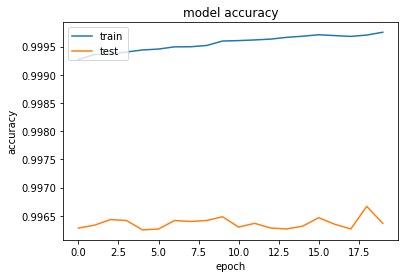

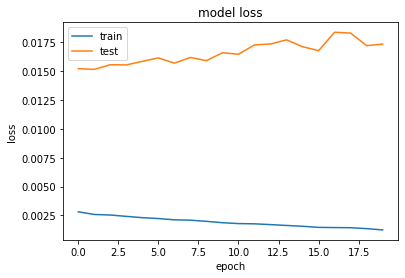

Loss and accuracy:  [0.022055238485336304, 0.995460033416748]


In [ ]:
params2['epochs'] = 20
m2_2 = model_training(model2, params2, x_train2, y_train, x_test2, y_test) # 20 epochs

Epoch 1/30
422/422 [==============================] - 26s 60ms/step - loss: 0.0013 - binary_accuracy: 0.9997 - val_loss: 0.0179 - val_binary_accuracy: 0.9963
Epoch 2/30
422/422 [==============================] - 24s 58ms/step - loss: 0.0013 - binary_accuracy: 0.9997 - val_loss: 0.0178 - val_binary_accuracy: 0.9965
Epoch 3/30
422/422 [==============================] - 24s 57ms/step - loss: 0.0012 - binary_accuracy: 0.9997 - val_loss: 0.0181 - val_binary_accuracy: 0.9963
Epoch 4/30
422/422 [==============================] - 24s 58ms/step - loss: 0.0011 - binary_accuracy: 0.9998 - val_loss: 0.0183 - val_binary_accuracy: 0.9963
Epoch 5/30
422/422 [==============================] - 26s 60ms/step - loss: 0.0011 - binary_accuracy: 0.9998 - val_loss: 0.0186 - val_binary_accuracy: 0.9966
Epoch 6/30
422/422 [==============================] - 25s 58ms/step - loss: 0.0010 - binary_accuracy: 0.9998 - val_loss: 0.0192 - val_binary_accuracy: 0.9960
Epoch 7/30
422/422 [==============================] 

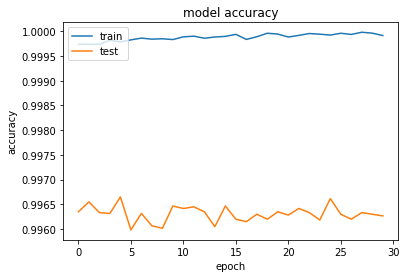

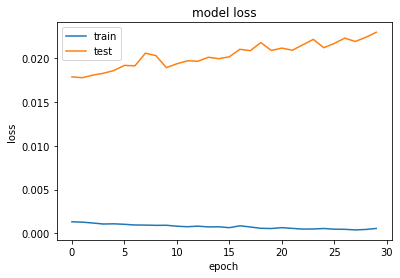

Loss and accuracy:  [0.029348425567150116, 0.995330274105072]


In [ ]:
params2['epochs'] = 30
m2_3 = model_training(model2, params2, x_train2, y_train, x_test2, y_test)

**Два свёрточных слоя, один полносвязный**

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, (3,3), padding='same', activation='relu',input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2), strides=2))
model3.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model3.add(MaxPooling2D((2, 2), strides=2))
model3.add(Flatten())
model3.add(Dense(10,  activation='sigmoid'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

Epoch 1/15
422/422 [==============================] - 61s 143ms/step - loss: 0.0894 - binary_accuracy: 0.9701 - val_loss: 0.0217 - val_binary_accuracy: 0.9936
Epoch 2/15
422/422 [==============================] - 58s 138ms/step - loss: 0.0216 - binary_accuracy: 0.9931 - val_loss: 0.0150 - val_binary_accuracy: 0.9956
Epoch 3/15
422/422 [==============================] - 58s 137ms/step - loss: 0.0153 - binary_accuracy: 0.9951 - val_loss: 0.0118 - val_binary_accuracy: 0.9965
Epoch 4/15
422/422 [==============================] - 58s 137ms/step - loss: 0.0125 - binary_accuracy: 0.9959 - val_loss: 0.0101 - val_binary_accuracy: 0.9971
Epoch 5/15
422/422 [==============================] - 59s 140ms/step - loss: 0.0104 - binary_accuracy: 0.9966 - val_loss: 0.0096 - val_binary_accuracy: 0.9973
Epoch 6/15
422/422 [==============================] - 57s 136ms/step - loss: 0.0093 - binary_accuracy: 0.9970 - val_loss: 0.0092 - val_binary_accuracy: 0.9973
Epoch 7/15
422/422 [==========================

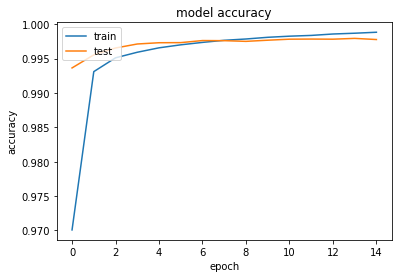

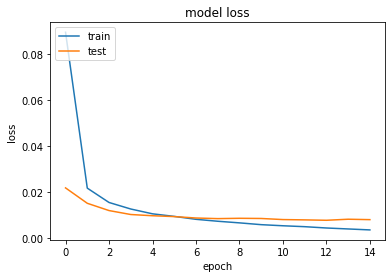

Loss and accuracy:  [0.008351699449121952, 0.9973897337913513]


In [ ]:
params2['epochs'] = 15
m3_1 = model_training(model3, params2, x_train2, y_train, x_test2, y_test)

Epoch 1/20
422/422 [==============================] - 70s 163ms/step - loss: 0.0033 - binary_accuracy: 0.9989 - val_loss: 0.0080 - val_binary_accuracy: 0.9980
Epoch 2/20
422/422 [==============================] - 76s 180ms/step - loss: 0.0029 - binary_accuracy: 0.9990 - val_loss: 0.0079 - val_binary_accuracy: 0.9979
Epoch 3/20
422/422 [==============================] - 62s 147ms/step - loss: 0.0025 - binary_accuracy: 0.9991 - val_loss: 0.0086 - val_binary_accuracy: 0.9977
Epoch 4/20
422/422 [==============================] - 63s 149ms/step - loss: 0.0023 - binary_accuracy: 0.9993 - val_loss: 0.0089 - val_binary_accuracy: 0.9978
Epoch 5/20
422/422 [==============================] - 60s 141ms/step - loss: 0.0019 - binary_accuracy: 0.9994 - val_loss: 0.0091 - val_binary_accuracy: 0.9977
Epoch 6/20
422/422 [==============================] - 59s 140ms/step - loss: 0.0018 - binary_accuracy: 0.9994 - val_loss: 0.0097 - val_binary_accuracy: 0.9977
Epoch 7/20
422/422 [==========================

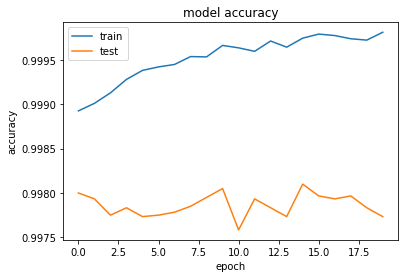

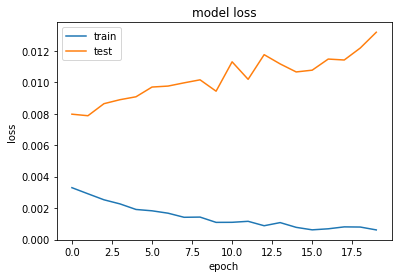

Loss and accuracy:  [0.013578018173575401, 0.9973796010017395]


In [ ]:
params2['epochs'] = 20
m3_2 = model_training(model3, params2, x_train2, y_train, x_test2, y_test)

Epoch 1/30
422/422 [==============================] - 72s 168ms/step - loss: 6.1657e-04 - binary_accuracy: 0.9998 - val_loss: 0.0143 - val_binary_accuracy: 0.9977
Epoch 2/30
422/422 [==============================] - 68s 161ms/step - loss: 4.9850e-04 - binary_accuracy: 0.9999 - val_loss: 0.0125 - val_binary_accuracy: 0.9980
Epoch 3/30
422/422 [==============================] - 65s 153ms/step - loss: 3.4827e-04 - binary_accuracy: 0.9999 - val_loss: 0.0138 - val_binary_accuracy: 0.9978
Epoch 4/30
422/422 [==============================] - 65s 153ms/step - loss: 6.4033e-04 - binary_accuracy: 0.9998 - val_loss: 0.0180 - val_binary_accuracy: 0.9971
Epoch 5/30
422/422 [==============================] - 60s 142ms/step - loss: 7.9844e-04 - binary_accuracy: 0.9998 - val_loss: 0.0123 - val_binary_accuracy: 0.9978
Epoch 6/30
422/422 [==============================] - 60s 142ms/step - loss: 2.3442e-04 - binary_accuracy: 0.9999 - val_loss: 0.0133 - val_binary_accuracy: 0.9980
Epoch 7/30
422/422 [==

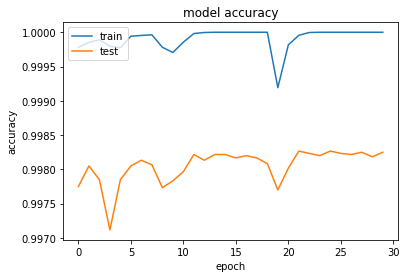

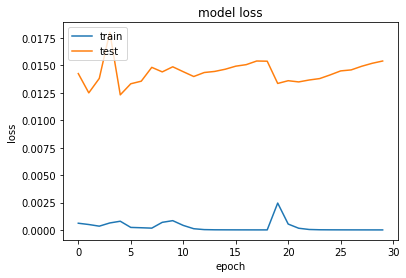

Loss and accuracy:  [0.016884932294487953, 0.9976000189781189]


In [ ]:
params2['epochs'] = 30
m3_3 = model_training(model3, params2, x_train2, y_train, x_test2, y_test)

**Три сверточных слоя, один полносвязный**

In [ ]:
model4 = Sequential()
model4.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model4.add(MaxPooling2D((2, 2), strides=2))
model4.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D((2, 2), strides=2))
model4.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D((2, 2), strides=2))
model4.add(Flatten())
model4.add(Dense(10,  activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)        

Epoch 1/15
422/422 [==============================] - 41s 96ms/step - loss: 0.1099 - binary_accuracy: 0.9684 - val_loss: 0.0215 - val_binary_accuracy: 0.9953
Epoch 2/15
422/422 [==============================] - 40s 94ms/step - loss: 0.0210 - binary_accuracy: 0.9949 - val_loss: 0.0138 - val_binary_accuracy: 0.9968
Epoch 3/15
422/422 [==============================] - 40s 95ms/step - loss: 0.0144 - binary_accuracy: 0.9965 - val_loss: 0.0119 - val_binary_accuracy: 0.9975
Epoch 4/15
422/422 [==============================] - 40s 95ms/step - loss: 0.0111 - binary_accuracy: 0.9974 - val_loss: 0.0101 - val_binary_accuracy: 0.9976
Epoch 5/15
422/422 [==============================] - 40s 96ms/step - loss: 0.0095 - binary_accuracy: 0.9977 - val_loss: 0.0093 - val_binary_accuracy: 0.9979
Epoch 6/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0078 - binary_accuracy: 0.9983 - val_loss: 0.0080 - val_binary_accuracy: 0.9983
Epoch 7/15
422/422 [==============================] 

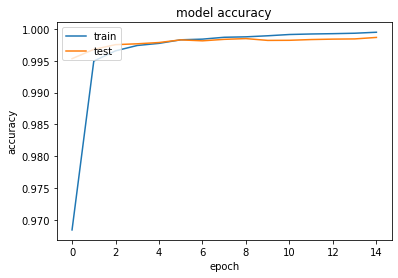

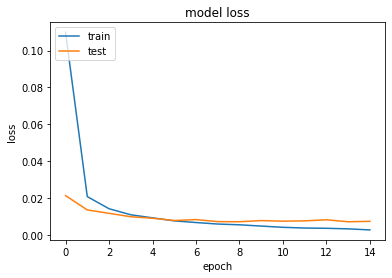

Loss and accuracy:  [0.007172178477048874, 0.9982396364212036]


In [ ]:
params2['epochs'] = 15
m4_1 = model_training(model4, params2, x_train2, y_train, x_test2, y_test)

Epoch 1/20
422/422 [==============================] - 42s 99ms/step - loss: 0.0030 - binary_accuracy: 0.9995 - val_loss: 0.0079 - val_binary_accuracy: 0.9984
Epoch 2/20
422/422 [==============================] - 42s 100ms/step - loss: 0.0024 - binary_accuracy: 0.9996 - val_loss: 0.0077 - val_binary_accuracy: 0.9983
Epoch 3/20
422/422 [==============================] - 42s 99ms/step - loss: 0.0021 - binary_accuracy: 0.9997 - val_loss: 0.0078 - val_binary_accuracy: 0.9985
Epoch 4/20
422/422 [==============================] - 43s 102ms/step - loss: 0.0020 - binary_accuracy: 0.9997 - val_loss: 0.0073 - val_binary_accuracy: 0.9985
Epoch 5/20
422/422 [==============================] - 43s 102ms/step - loss: 0.0019 - binary_accuracy: 0.9997 - val_loss: 0.0082 - val_binary_accuracy: 0.9985
Epoch 6/20
422/422 [==============================] - 42s 99ms/step - loss: 0.0016 - binary_accuracy: 0.9998 - val_loss: 0.0109 - val_binary_accuracy: 0.9986
Epoch 7/20
422/422 [=============================

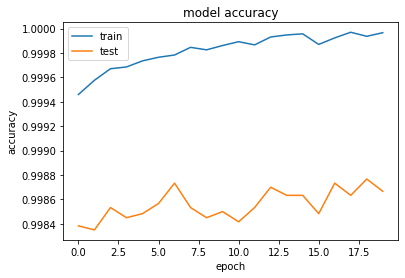

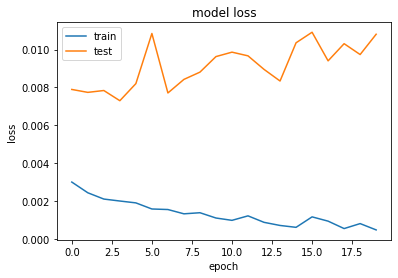

Loss and accuracy:  [0.011761239729821682, 0.9984797835350037]


In [ ]:
params2['epochs'] = 20
m4_2 = model_training(model4, params2, x_train2, y_train, x_test2, y_test)

Epoch 1/30
422/422 [==============================] - 41s 97ms/step - loss: 8.6761e-04 - binary_accuracy: 0.9999 - val_loss: 0.0107 - val_binary_accuracy: 0.9986
Epoch 2/30
422/422 [==============================] - 41s 97ms/step - loss: 4.2445e-04 - binary_accuracy: 1.0000 - val_loss: 0.0111 - val_binary_accuracy: 0.9986
Epoch 3/30
422/422 [==============================] - 42s 100ms/step - loss: 9.3105e-04 - binary_accuracy: 0.9999 - val_loss: 0.0119 - val_binary_accuracy: 0.9985
Epoch 4/30
422/422 [==============================] - 42s 99ms/step - loss: 5.4633e-04 - binary_accuracy: 1.0000 - val_loss: 0.0113 - val_binary_accuracy: 0.9985
Epoch 5/30
422/422 [==============================] - 42s 99ms/step - loss: 4.3179e-04 - binary_accuracy: 1.0000 - val_loss: 0.0124 - val_binary_accuracy: 0.9985
Epoch 6/30
422/422 [==============================] - 42s 99ms/step - loss: 4.7251e-04 - binary_accuracy: 1.0000 - val_loss: 0.0117 - val_binary_accuracy: 0.9987
Epoch 7/30
422/422 [=======

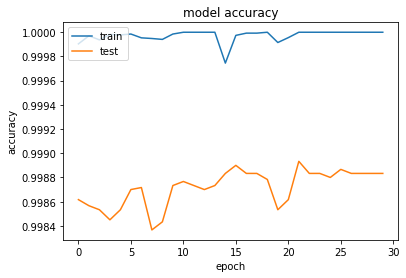

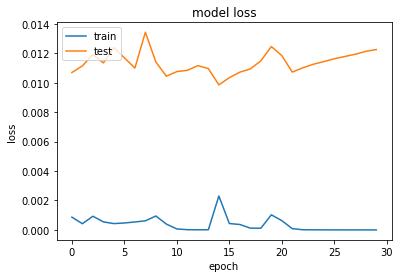

Loss and accuracy:  [0.012980522587895393, 0.9986498951911926]


In [ ]:
params2['epochs'] = 30
m4_3 = model_training(model4, params2, x_train2, y_train, x_test2, y_test)

**Два сверточных слоя, два полносвязных**

In [ ]:
model5 = Sequential()
model5.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model5.add(MaxPooling2D((2, 2), strides=2))
model5.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model5.add(MaxPooling2D((2, 2), strides=2))
model5.add(Flatten())
model5.add(Dense(hidden_size, activation='relu'))
model5.add(Dense(num_classes, activation='softmax'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

Epoch 1/15
422/422 [==============================] - 41s 95ms/step - loss: 0.0565 - binary_accuracy: 0.9841 - val_loss: 0.0148 - val_binary_accuracy: 0.9963
Epoch 2/15
422/422 [==============================] - 39s 92ms/step - loss: 0.0137 - binary_accuracy: 0.9963 - val_loss: 0.0094 - val_binary_accuracy: 0.9976
Epoch 3/15
422/422 [==============================] - 40s 95ms/step - loss: 0.0094 - binary_accuracy: 0.9974 - val_loss: 0.0082 - val_binary_accuracy: 0.9980
Epoch 4/15
422/422 [==============================] - 39s 93ms/step - loss: 0.0071 - binary_accuracy: 0.9981 - val_loss: 0.0074 - val_binary_accuracy: 0.9982
Epoch 5/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0058 - binary_accuracy: 0.9985 - val_loss: 0.0072 - val_binary_accuracy: 0.9982
Epoch 6/15
422/422 [==============================] - 39s 93ms/step - loss: 0.0045 - binary_accuracy: 0.9989 - val_loss: 0.0077 - val_binary_accuracy: 0.9979
Epoch 7/15
422/422 [==============================]

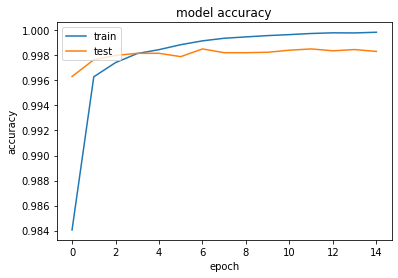

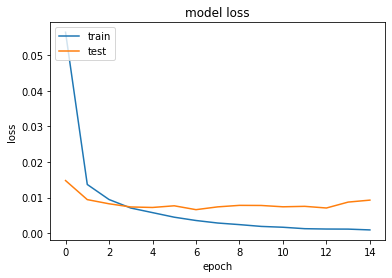

Loss and accuracy:  [0.007458383217453957, 0.9982296824455261]


In [ ]:
params2['epochs'] = 15
m5_1 = model_training(model5, params2, x_train2, y_train, x_test2, y_test)

Epoch 1/20
422/422 [==============================] - 41s 97ms/step - loss: 0.0011 - binary_accuracy: 0.9998 - val_loss: 0.0099 - val_binary_accuracy: 0.9982
Epoch 2/20
422/422 [==============================] - 40s 95ms/step - loss: 6.9307e-04 - binary_accuracy: 0.9999 - val_loss: 0.0094 - val_binary_accuracy: 0.9985
Epoch 3/20
422/422 [==============================] - 39s 92ms/step - loss: 7.7887e-04 - binary_accuracy: 0.9999 - val_loss: 0.0089 - val_binary_accuracy: 0.9986
Epoch 4/20
422/422 [==============================] - 40s 95ms/step - loss: 7.2879e-04 - binary_accuracy: 0.9999 - val_loss: 0.0094 - val_binary_accuracy: 0.9983
Epoch 5/20
422/422 [==============================] - 39s 92ms/step - loss: 7.4292e-04 - binary_accuracy: 0.9999 - val_loss: 0.0087 - val_binary_accuracy: 0.9985
Epoch 6/20
422/422 [==============================] - 40s 94ms/step - loss: 4.9947e-04 - binary_accuracy: 0.9999 - val_loss: 0.0094 - val_binary_accuracy: 0.9983
Epoch 7/20
422/422 [============

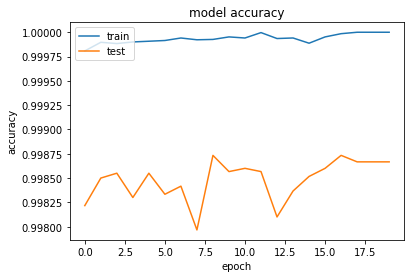

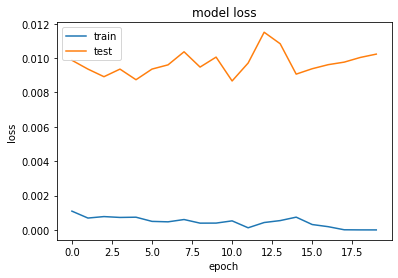

Loss and accuracy:  [0.008290608413517475, 0.9985998272895813]


In [ ]:
params2['epochs'] = 20
m5_2 = model_training(model5, params2, x_train2, y_train, x_test2, y_test)

Epoch 1/30
422/422 [==============================] - 40s 94ms/step - loss: 4.5832e-04 - binary_accuracy: 0.9999 - val_loss: 0.0122 - val_binary_accuracy: 0.9985
Epoch 2/30
422/422 [==============================] - 40s 94ms/step - loss: 3.4053e-04 - binary_accuracy: 1.0000 - val_loss: 0.0128 - val_binary_accuracy: 0.9984
Epoch 3/30
422/422 [==============================] - 40s 95ms/step - loss: 1.9132e-04 - binary_accuracy: 1.0000 - val_loss: 0.0109 - val_binary_accuracy: 0.9986
Epoch 4/30
422/422 [==============================] - 39s 91ms/step - loss: 2.6905e-04 - binary_accuracy: 1.0000 - val_loss: 0.0107 - val_binary_accuracy: 0.9986
Epoch 5/30
422/422 [==============================] - 40s 95ms/step - loss: 6.6715e-05 - binary_accuracy: 1.0000 - val_loss: 0.0107 - val_binary_accuracy: 0.9986
Epoch 6/30
422/422 [==============================] - 39s 92ms/step - loss: 4.3873e-05 - binary_accuracy: 1.0000 - val_loss: 0.0104 - val_binary_accuracy: 0.9986
Epoch 7/30
422/422 [========

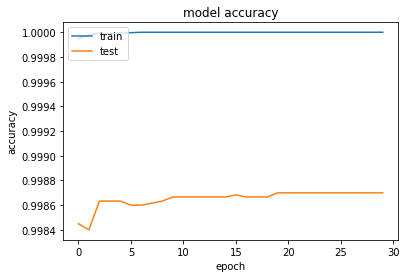

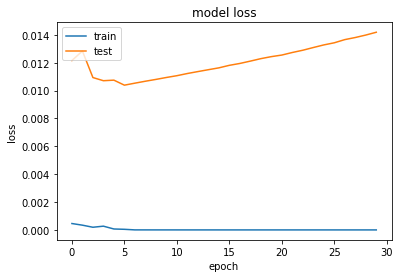

Loss and accuracy:  [0.011701728217303753, 0.998619794845581]


In [ ]:
params2['epochs'] = 30
m5_3 = model_training(model5, params2, x_train2, y_train, x_test2, y_test)

Лучший результат дала архитектура с 3 сверточными слоями и одним полносвязным и 30 эпохами

* На лучшую архитектуру дополнительно добавить между слоями:
    * *MaxPooling*
    * *Dropout*
    * *BatchNormalization*

In [ ]:
model_final = Sequential()
model_final.add(Dropout(0.02, input_shape=(28, 28, 1)))
model_final.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model_final.add(MaxPooling2D((2, 2), strides=2))
model_final.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model_final.add(MaxPooling2D((2, 2), strides=2))
model_final.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_final.add(MaxPooling2D((2, 2), strides=2))
model_final.add(Flatten())
model_final.add(BatchNormalization())
model_final.add(Dense(10,  activation='softmax'))

* Обучать модели с падением скорости обучения (learning rate) в оптимизаторах лоса по технике step decay

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

In [ ]:
import math
from keras.callbacks import LearningRateScheduler
from keras.callbacks import Callback

def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(step_decay(len(self.losses)))

loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]

In [ ]:
model_final.compile(loss=params2['loss'], optimizer = 'sgd', metrics = params2['metrics'])
history = model_final.fit(x_train2, y_train, validation_data=(x_test2, y_test), epochs=30, batch_size=batch_size, callbacks=callbacks_list)

Epoch 1/30
469/469 [==============================] - 48s 101ms/step - loss: 0.1730 - binary_accuracy: 0.9763 - val_loss: 0.0866 - val_binary_accuracy: 0.9880 - lr: 0.1000
Epoch 2/30
469/469 [==============================] - 49s 104ms/step - loss: 0.0431 - binary_accuracy: 0.9926 - val_loss: 0.0325 - val_binary_accuracy: 0.9940 - lr: 0.1000
Epoch 3/30
469/469 [==============================] - 46s 99ms/step - loss: 0.0300 - binary_accuracy: 0.9945 - val_loss: 0.0244 - val_binary_accuracy: 0.9953 - lr: 0.1000
Epoch 4/30
469/469 [==============================] - 47s 101ms/step - loss: 0.0244 - binary_accuracy: 0.9953 - val_loss: 0.0200 - val_binary_accuracy: 0.9960 - lr: 0.1000
Epoch 5/30
469/469 [==============================] - 47s 100ms/step - loss: 0.0209 - binary_accuracy: 0.9960 - val_loss: 0.0188 - val_binary_accuracy: 0.9962 - lr: 0.1000
Epoch 6/30
469/469 [==============================] - 49s 105ms/step - loss: 0.0185 - binary_accuracy: 0.9963 - val_loss: 0.0168 - val_binary

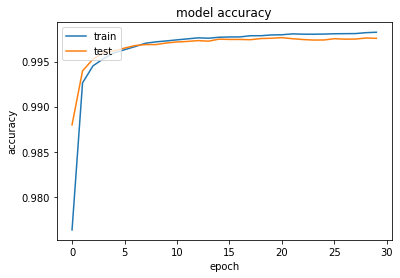

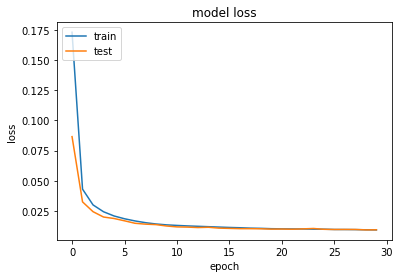

In [ ]:
plot_accuracy(history)
plot_loss(history)

**4.** Вывести в виде изображения по одному примеру из каждого класса с указанием результата работы лучшей модели в заголовке

**Tip:** https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html

313/313 [==============================] - 3s 9ms/step


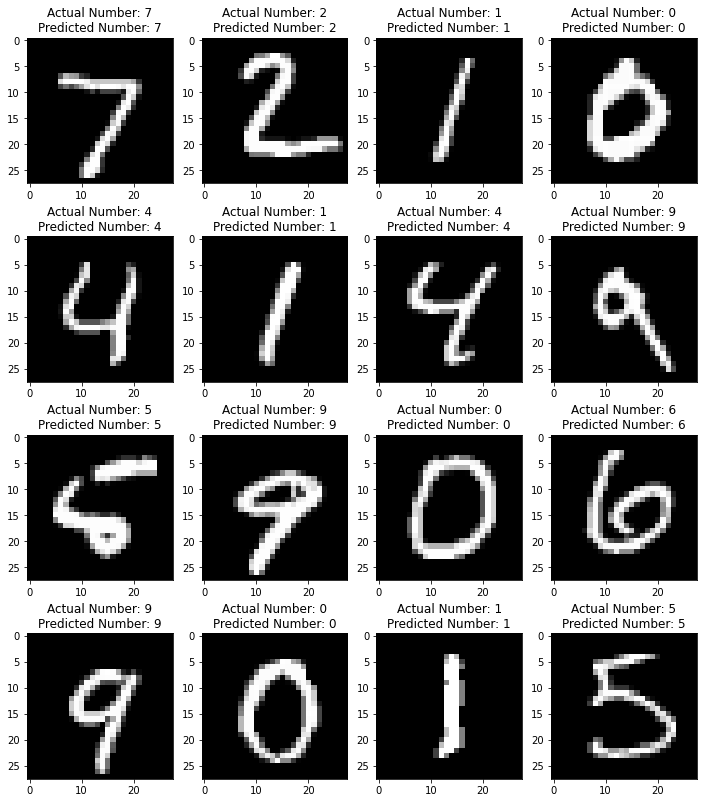

In [ ]:
res = model_final.evaluate(x_test2, y_test, verbose=1) 
y_pred = model_final.predict(x_test2)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='gray')
    ax.set(title = f"Actual Number: {y_test[i].argmax()}\nPredicted Number: {y_pred[i].argmax()}");

Help links:

- https://keras.io/about/
- https://keras.io/guides/sequential_model/
- https://keras.io/api/layers/
- https://keras.io/api/callbacks/
- https://keras.io/api/optimizers/
- https://keras.io/api/losses/
- https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5